To check GRU fits Date: April 11, 2025
Bngl run has been changed

import sys
sys.path.append('/homedd/gddaslab/mxp140/ca_signaling_surrogate_model')

In [1]:
# modules
import numpy as np
import pandas as pd
from run_bngl_avg import run_bionetgen_avg  # date April 11, 2025
from solve_ca_ode import solve_ca
import matplotlib.pyplot as plt

In [63]:
### change your estimaed values here : Maitreya
# estimates=[1.00061715e-04, 1.00012748e-03, 9.84447591e+05, 3.16075298e+00,3.52833111e-02]#Maitreya
# estimates=[1.00061715e-04, 1.00012748e-03, 7.79701187e+05, 1.00003822e+00,3.37331165e-02]  #50k
estimates = np.array([[1.15341879e-01, 1.50156945e-01, 1.00008997e+03, 3.84871387e+00,
        1.00015219e-04]], dtype=np.float32)
estimates = estimates[0]
kon = estimates[0]
koff = estimates[1]
C1 = estimates[2]
C2 = estimates[3]
g = estimates[4]

# kon=0.0002673049082510339
# koff=0.010551230151439562
# C1=177915.28609619488
# C2=2.1640109518946167
# g=0.005120023560695736

print(f"kon={kon}")
print(f"koff={koff}")
print(f"C1={C1}")
print(f"C2={C2}")
print(f"g={g}")

kon=0.11534187942743301
koff=0.15015694499015808
C1=1000.0899658203125
C2=3.8487138748168945
g=0.00010001521877711639


In [66]:
# data=pd.read_csv('expt_ca_data/CD3z_mouse_WT_33k.dat',sep="\t", comment='#', header=None) #ZAP only

data = pd.read_csv(
    "expt_ca_data/46L_50F_100k.dat", sep="\t", comment="#", header=None
)  # ZAP only
# data=pd.read_csv('expt_ca_data/46L_50F_53V_85k.dat',sep="\t", comment='#', header=None) #ZAP only
# data=pd.read_csv('expt_ca_data/46L_53V_80k.dat',sep="\t", comment='#', header=None) #ZAP only
# data=pd.read_csv('expt_ca_data/CD3z_46L_50k.dat',sep="\t", comment='#', header=None) #ZAP only
# data=pd.read_csv('expt_ca_data/human_CD3z_mean.dat',sep="\t", comment='#', header=None) #ZAP only
# data=pd.read_csv('expt_ca_data/CD3z_mouse_WT_33k.dat',sep="\t", comment='#', header=None) #ZAP only

data = np.asarray(data)  # experimental time
TT = data[:, 0]  #
Ca_data = data[:, 1]

 (SSR error)**0.25 = 1246.6119027352568


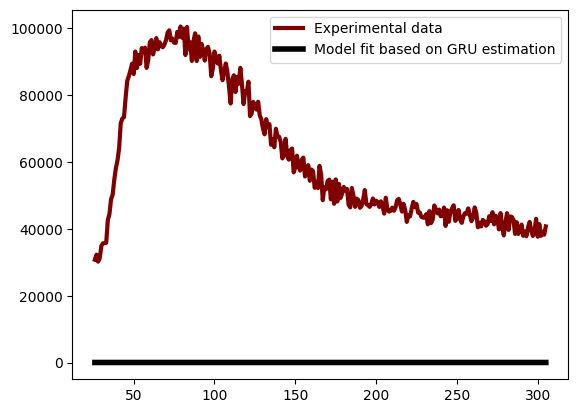

In [68]:
# Loading the experimental data file : Maitreya


n = 3  # averaging over 3  trajectories : John/ MAITREYA you can change this
p = 1  # 2nd column in the file: pZAP is printed on the first column, time is printed on the zeroth column

time, mean_pZAP = run_bionetgen_avg(n, p, kon, koff)  # [0, 300]

tnew, ca = solve_ca(
    time, mean_pZAP, kon, koff, C1, C2, g, TT, Ca_data
)  # solving the ODEs

# plot
plt.plot(TT, Ca_data, color="maroon", linewidth=3, label="Experimental data")
plt.plot(
    tnew, ca/1000, color="black", linewidth=4, label="Model fit based on GRU estimation"
)
# plt.plot(tnew, idata, color='g', linewidth=2, label='interpolated data')
plt.legend()
plt.show()

In [54]:
import random
import numpy as np
import pandas as pd

from interpolation import spline
from interpolation_exp_data import exp_idata
# from ca_ODE import calcium, solve
import matplotlib.pyplot as plt

In [55]:
# . In silico Model run starts here
N = 280  # Ca signal at N time points
tstart = 26.0  # Fit to be start from which timepoint : interpolation of pZAP70 signal starts at 25 sec
Vc = 25  # pZAP molecules in the simulation box of size 25 um^3
z = 602  # constant factor to convert from molecules/um3 to uM

# # 2.Interpolate time, PZAP  from 600 points to 2000 points  [26,300]
# tnew, PZAP = spline(time, mean_pZAP, N, tstart)

In [56]:
tnew, ca = solve_ca(time, mean_pZAP, C1, C2, g)  # solving the ODEs

In [60]:
ca[26:].shape

(280,)

In [25]:
np.sum(((ca[26:]-Ca_data)/np.max(Ca_data))**2)

np.float64(481.6516376411024)

In [4]:
df = pd.read_csv('best_prediction_ca_signal.csv', sep=',')
df

,Unnamed: 0,time,ca_data,ca_pred
0,0,26.0,30790.31055,33163.155081
1,1,27.0,32305.18945,33163.955831
2,2,28.0,30209.66406,33164.977779
3,3,29.0,31233.17773,33166.148723
4,4,30.0,34943.14453,33167.550639
...,...,...,...,...
275,275,301.0,41426.54297,2063.000000
276,276,302.0,37931.63672,2067.000000
277,277,303.0,39177.45312,2072.000000
278,278,304.0,38280.71094,2081.000000


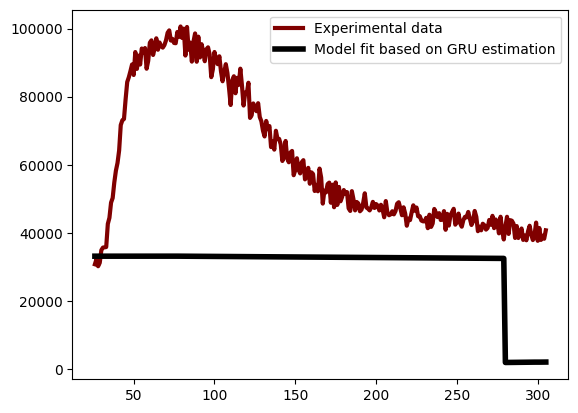

In [5]:
plt.plot(df['time'], df['ca_data'], color="maroon", linewidth=3, label="Experimental data")
plt.plot(df['time'], df['ca_pred'], color="black", linewidth=4, label="Model fit based on GRU estimation"
)
# plt.plot(tnew, idata, color='g', linewidth=2, label='interpolated data')
plt.legend()
plt.show()